In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.shape

(1338, 7)

In [4]:
data.describe()

,age,bmi,children,charges
count,1335.000000,1334.000000,1335.000000,1338.000000
mean,39.214232,30.665390,1.094382,13270.422265
std,14.051488,6.098268,1.206587,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data[data.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges
48,60.0,female,NaN,0.0,no,southeast,12629.89670
74,44.0,male,27.400,NaN,no,southwest,7726.85400
89,55.0,female,NaN,0.0,no,northwest,11082.57720
126,19.0,female,NaN,0.0,yes,southwest,17081.08000
138,NaN,female,31.900,3.0,no,southeast,27322.73386
282,NaN,male,27.645,1.0,no,northeast,4237.12655
684,33.0,female,18.500,NaN,no,southwest,4766.02200
692,20.0,male,32.395,NaN,no,northwest,2362.22905
693,NaN,male,23.655,0.0,no,northwest,2352.96845
695,26.0,female,NaN,0.0,no,northwest,3201.24515


In [7]:
data[(data==0).any(axis=1)]

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
9,60.0,female,25.840,0.0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1331,23.0,female,33.400,0.0,no,southwest,10795.93733
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [8]:
data.mean(numeric_only=True)


age            39.214232
bmi            30.665390
children        1.094382
charges     13270.422265
dtype: float64

In [9]:
datareplaced1 = data[['age' , 'children']].fillna(data[['age' , 'children']].mode(numeric_only=True).iloc[0])
datareplaced2 = data[['bmi' , 'charges']].fillna(data[['bmi' , 'charges']].mean(numeric_only=True))
datareplaced3 = data[['sex' , 'region' , 'smoker']]
datarep = pd.concat([datareplaced1 , datareplaced2 , datareplaced3] , axis = 1)
datarep.isna().sum()

age         0
children    0
bmi         0
charges     0
sex         0
region      0
smoker      0
dtype: int64

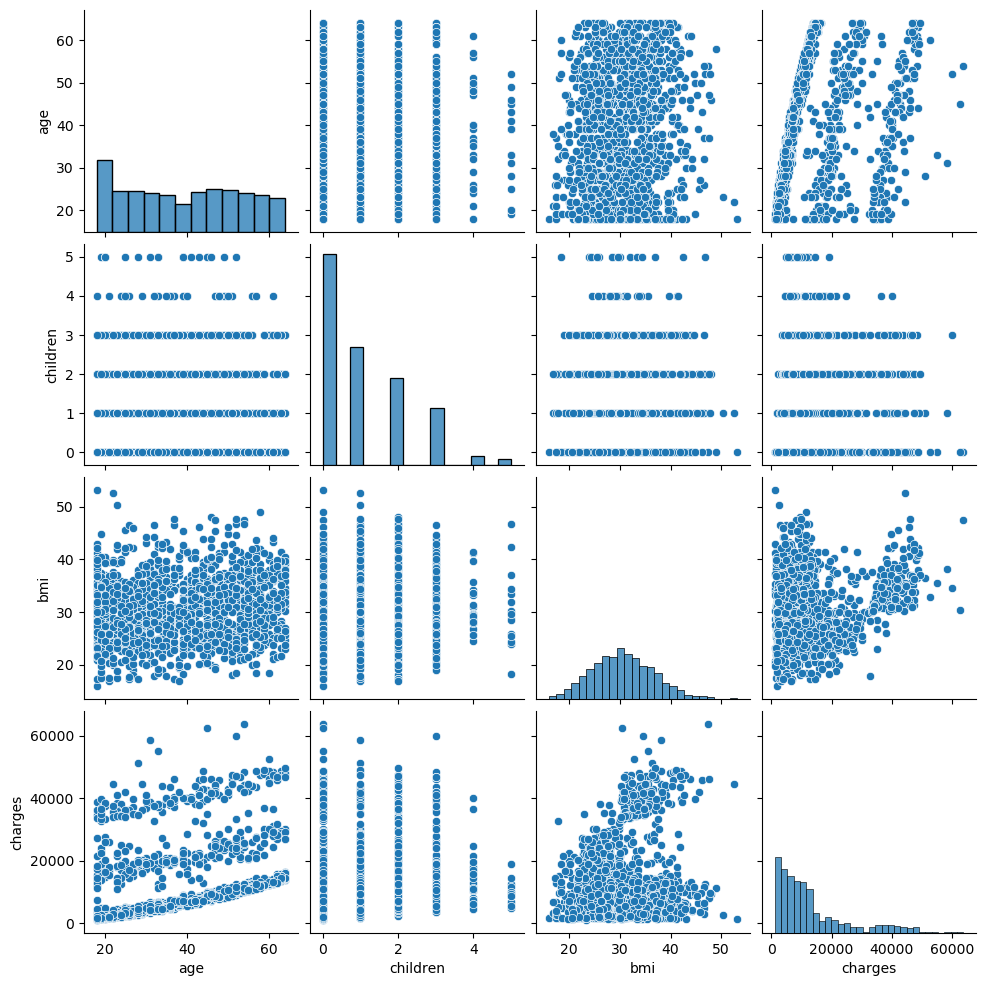

In [10]:
sns.pairplot(datarep)

In [11]:
datarep[:100]

,age,children,bmi,charges,sex,region,smoker
0,19.0,0.0,27.900,16884.92400,female,southwest,yes
1,18.0,1.0,33.770,1725.55230,male,southeast,no
2,28.0,3.0,33.000,4449.46200,male,southeast,no
3,33.0,0.0,22.705,21984.47061,male,northwest,no
4,32.0,0.0,28.880,3866.85520,male,northwest,no
...,...,...,...,...,...,...,...
95,28.0,1.0,37.620,3766.88380,female,southeast,no
96,54.0,3.0,30.800,12105.32000,female,southwest,no
97,55.0,0.0,38.280,10226.28420,male,southeast,no
98,56.0,0.0,19.950,22412.64850,male,northeast,yes


In [12]:
datarep[(datarep['age'] == 60) & (datarep['region'] == 'southwest')][['age' , 'region' , 'charges' , 'smoker']]

,age,region,charges,smoker
39,60.0,southwest,48173.36100,yes
433,60.0,southwest,12638.19500,no
466,60.0,southwest,13224.69300,no
715,60.0,southwest,12146.97100,no
904,60.0,southwest,12644.58900,no
1146,60.0,southwest,52590.82939,yes


In [13]:
datarep[(datarep['age']> 20) & (datarep['smoker'] == 'yes')]

,age,children,bmi,charges,sex,region,smoker
11,62.0,0.0,26.290,27808.72510,female,southeast,yes
14,27.0,0.0,42.130,39611.75770,male,southeast,yes
19,30.0,0.0,35.300,36837.46700,male,southwest,yes
23,34.0,1.0,31.920,37701.87680,female,northeast,yes
29,31.0,2.0,36.300,38711.00000,male,southwest,yes
...,...,...,...,...,...,...,...
1308,25.0,0.0,30.200,33900.65300,female,southwest,yes
1314,30.0,3.0,23.655,18765.87545,female,northwest,yes
1321,62.0,0.0,26.695,28101.33305,male,northeast,yes
1323,42.0,2.0,40.370,43896.37630,female,southeast,yes


In [14]:
labels = datarep['charges']
features = datarep.drop(columns=['charges'])

Feature_train, Feature_test, Label_train, Label_test = train_test_split(
    features,        
    labels,      
    test_size=0.25,  
)

In [15]:
Feature_train

,age,children,bmi,sex,region,smoker
1158,20.0,0.0,30.590,female,northeast,no
635,64.0,0.0,38.190,male,northeast,no
532,59.0,2.0,29.700,male,southeast,no
1298,33.0,2.0,27.455,male,northwest,no
174,24.0,0.0,33.345,female,northwest,no
...,...,...,...,...,...,...
422,40.0,1.0,32.775,male,northeast,yes
1160,43.0,1.0,34.580,female,northwest,no
490,19.0,0.0,32.900,female,southwest,no
352,30.0,0.0,27.700,female,southwest,no


In [16]:
Feature_test

,age,children,bmi,sex,region,smoker
86,57.0,0.0,31.160,female,northwest,yes
471,18.0,0.0,30.115,female,northeast,no
1204,18.0,3.0,27.280,female,southeast,yes
173,35.0,1.0,34.800,female,southwest,no
1255,42.0,0.0,37.900,female,southwest,no
...,...,...,...,...,...,...
1313,19.0,2.0,34.700,female,southwest,yes
1048,25.0,1.0,22.515,female,northwest,no
1120,23.0,0.0,31.400,female,southwest,yes
1257,54.0,1.0,27.645,female,northwest,no


In [17]:
Label_train

1158     2459.72010
635     14410.93210
532     12925.88600
1298     5261.46945
174      2855.43755
           ...     
422     39125.33225
1160     7727.25320
490      1748.77400
352      3554.20300
175     48824.45000
Name: charges, Length: 1003, dtype: float64

In [18]:
Label_test

86      43578.93940
471      2203.47185
1204    18223.45120
173      5246.04700
1255     6474.01300
           ...     
1313    36397.57600
1048     3594.17085
1120    34166.27300
1257    11305.93455
640      6666.24300
Name: charges, Length: 335, dtype: float64

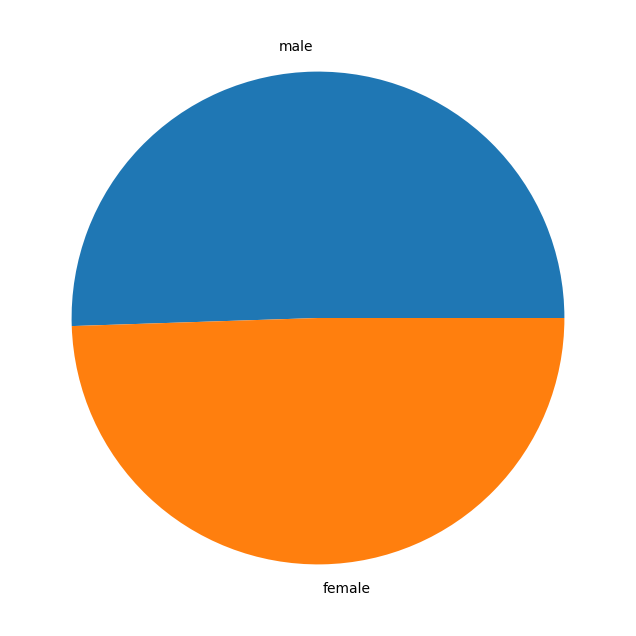

In [19]:
plt.figure(figsize=(8, 8)) 
year = datarep['sex'].value_counts()
plt.pie(year, labels=year.index)
plt.show()

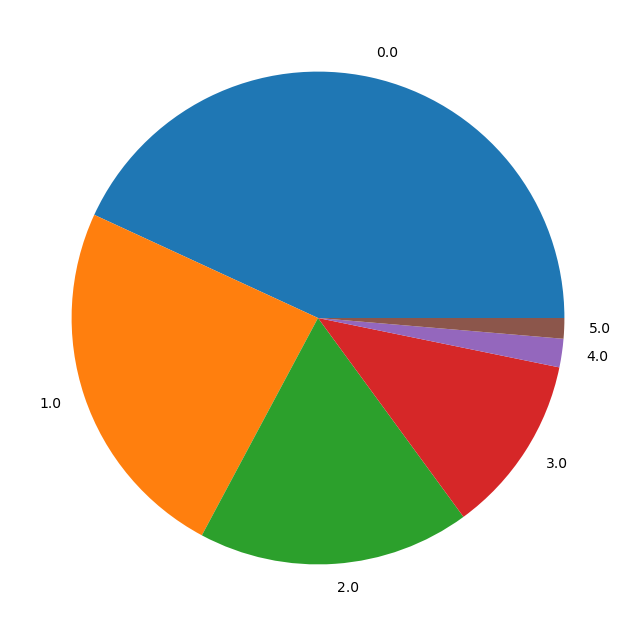

In [20]:
plt.figure(figsize=(8, 8)) 
year = datarep['children'].value_counts()
plt.pie(year, labels=year.index)
plt.show()

<BarContainer object of 1338 artists>

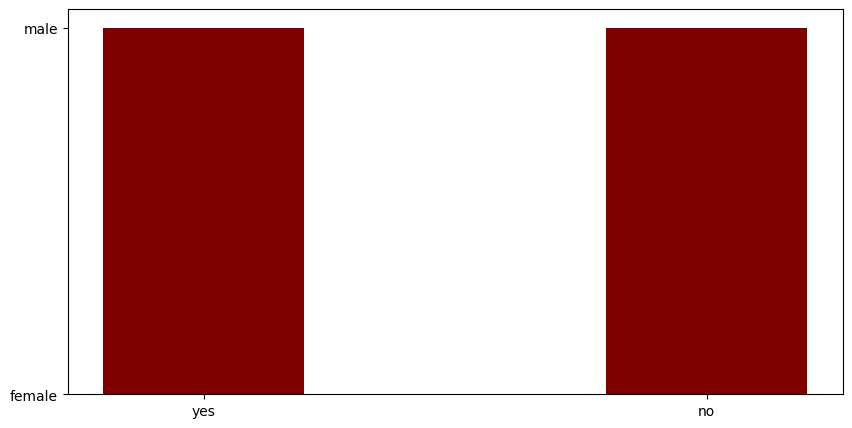

In [21]:
plt.figure(figsize = (10, 5))

plt.bar(datarep['smoker'], datarep['sex'], color ='maroon', 
        width = 0.4)

<BarContainer object of 1338 artists>

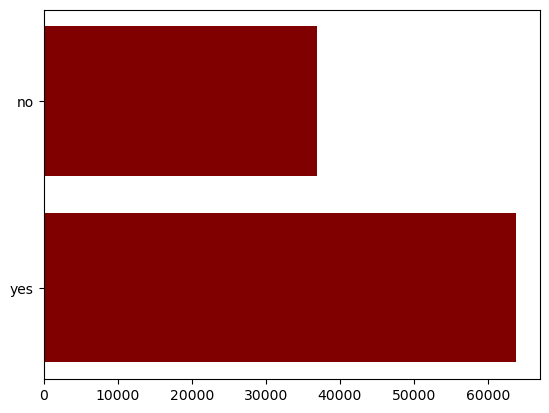

In [22]:
plt.barh(datarep['smoker'], datarep['charges'], color ='maroon')

([<matplotlib.patches.Wedge at 0x7f88044174f0>,
 [Text(0.10820268592373446, 1.094665327284504, 'female'),
  Text(-0.10820258343376975, -1.0946653374151656, 'male')])

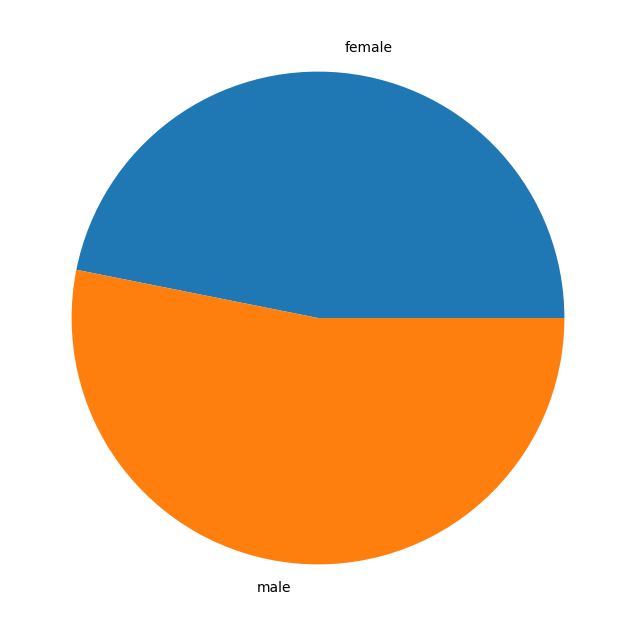

In [23]:
plt.figure(figsize = (10 , 8))
charges = datarep.groupby('sex')['charges'].sum()
plt.pie(charges , labels = charges.index)

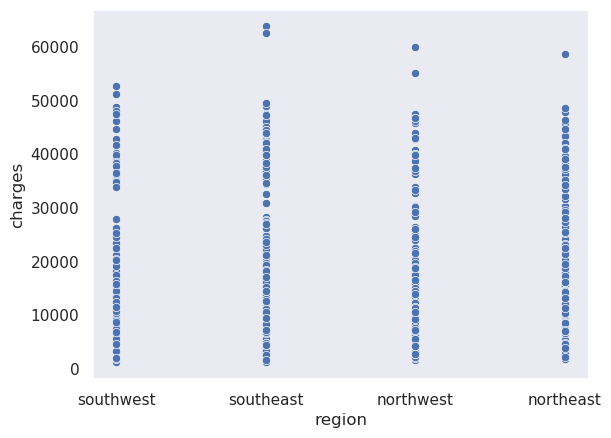

In [24]:
sns.set(style = 'dark')
sns.scatterplot(x='region' , y='charges' , data = datarep)

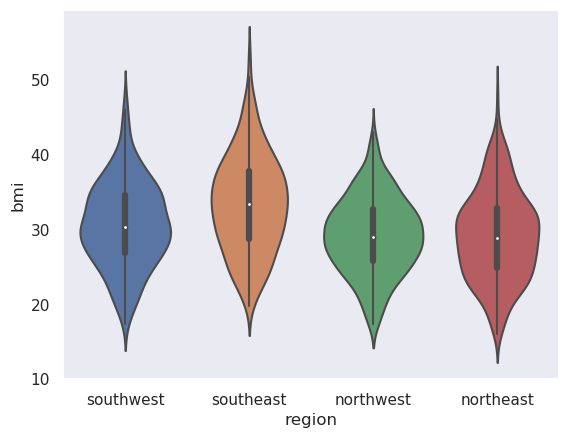

In [25]:
sns.violinplot(x='region' , y='bmi' , data = datarep)

In [26]:
obj = LinearRegression()
from sklearn.preprocessing import OneHotEncoder
encoded_data = pd.get_dummies(datarep, columns = ['sex', 'smoker' , 'region'])
encoded_data

,age,children,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0.0,27.900,16884.92400,True,False,False,True,False,False,False,True
1,18.0,1.0,33.770,1725.55230,False,True,True,False,False,False,True,False
2,28.0,3.0,33.000,4449.46200,False,True,True,False,False,False,True,False
3,33.0,0.0,22.705,21984.47061,False,True,True,False,False,True,False,False
4,32.0,0.0,28.880,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,3.0,30.970,10600.54830,False,True,True,False,False,True,False,False
1334,18.0,0.0,31.920,2205.98080,True,False,True,False,True,False,False,False
1335,18.0,0.0,36.850,1629.83350,True,False,True,False,False,False,True,False
1336,21.0,0.0,25.800,2007.94500,True,False,True,False,False,False,False,True


<!-- Single Variate Linear Regression
Feature Column = Age
Label Column = Charges -->

In [43]:
labels = encoded_data['charges']
features = encoded_data['age']

labels = np.array(labels).reshape((-1 , 1))
features = np.array(features).reshape((-1 , 1))

Feature_train, Feature_test, Label_train, Label_test = train_test_split(
    features,        
    labels,      
    test_size=0.25,  
)

In [44]:
obj.fit(Feature_train , Label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
predictions = obj.predict(Feature_test)

In [46]:
predictions

array([[10256.33410141],
       [ 8211.9609305 ],
       [ 9234.14751596],
       [15367.2670287 ],
       [15111.72038233],
       [17411.64019961],
       [12556.25391869],
       [14345.08044324],
       [19711.56001689],
       [15878.36032143],
       [ 9234.14751596],
       [19711.56001689],
       [ 7956.41428413],
       [17922.73349234],
       [10511.88074778],
       [12300.70727233],
       [12811.80056506],
       [14856.17373597],
       [16389.45361416],
       [11022.97404051],
       [17156.09355325],
       [16133.90696779],
       [18944.9200778 ],
       [16900.54690688],
       [17156.09355325],
       [17922.73349234],
       [13322.89385778],
       [12556.25391869],
       [19456.01337053],
       [17667.18684598],
       [17411.64019961],
       [14600.62708961],
       [14856.17373597],
       [ 7956.41428413],
       [17667.18684598],
       [13067.34721142],
       [14089.53379688],
       [17411.64019961],
       [19711.56001689],
       [15622.81367506],


In [62]:
predict_val = obj.predict(np.array(60).reshape((-1 , 1)))
predict_val

array([[18689.37343143]])

In [47]:
obj.intercept_

array([3356.57464958])

In [48]:
obj.coef_

array([[255.54664636]])

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(Label_test , predictions)

0.09413049201830648

In [51]:
obj.score(Label_test , predictions) * 100

-151002114.8503884

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mse = mean_squared_error(Label_test , predictions)
mse

130361411.12944338

In [54]:
rmse = np.sqrt(mse)
rmse

11417.592177400775

In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
mae = mean_absolute_error(Label_test , predictions)
mae

8996.425308000938

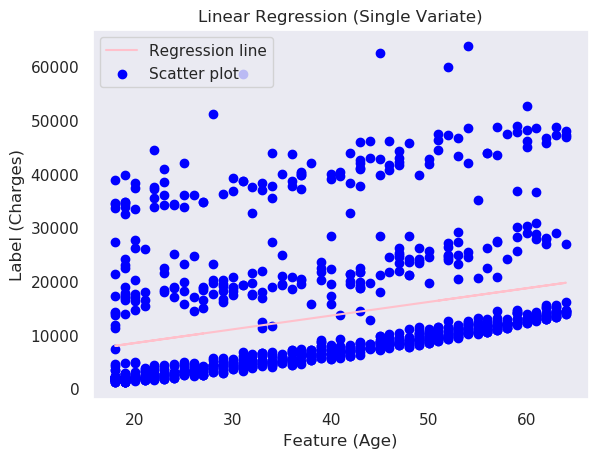

In [67]:
plt.scatter(Feature_train , Label_train , label='Scatter plot' , color = 'blue')
plt.plot(Feature_test , predictions , label='Regression line' , color = 'pink')
plt.xlabel('Feature (Age)')
plt.ylabel('Label (Charges)')
plt.title('Linear Regression (Single Variate)')
plt.legend()
plt.show()

In [131]:
labels = encoded_data['charges']
features = encoded_data.drop(columns=['charges'])

Feature_train, Feature_test, Label_train, Label_test = train_test_split(
    features,        
    labels,      
    test_size=0.25,  
)

In [132]:
obj.fit(Feature_train , Label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
predictions = obj.predict(Feature_test)

In [134]:
predictions

array([ 8258.92019307, 15370.80183678,  6466.58116201, 13541.92487402,
       13099.18189366, 10668.37039928,  6289.93054027, 10406.37958567,
       32958.44410281, 32415.46384178,  2787.72200312, 38089.8455096 ,
        3040.97555118, 27307.42009072,  5224.6045038 ,  7270.29435668,
        8109.83189546,  7123.36127223, 11043.85317191, 38018.46319342,
        6275.49055709, 33691.90146845, 13661.63283352, 10588.31798686,
       15070.93297452, 16583.18469114, 36020.23680553,  8474.14894369,
       37825.43070468,  4015.96242681, 32378.37636932,  3285.812883  ,
       14223.95778921, 15561.10182837, 14566.5392007 ,  2469.11209574,
       16109.65996338,  2887.62143235,  4657.60251077, 11014.90494381,
        9314.16392657,  1277.99544058, 11733.21007243,  3074.9396348 ,
        8516.81561492,  8081.6885983 ,  8848.26004767,  9816.13487794,
       12351.70231414, 27487.9769067 ,  1313.43174187, 10099.93542821,
        6515.95653443,  4380.42022741, 11400.18377731, 10893.20827634,
      

In [135]:
input_val = np.array([19.0 , 1.0 , 27.900 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 1]).reshape((1 , -1)) 
predict_val = obj.predict(input_val)
predict_val

array([26855.62806706])

In [136]:
obj.intercept_

609.1997451961561

In [137]:
obj.coef_

array([   246.9328615 ,    422.43833786,    320.13159986,     31.53080876,
          -31.53080876, -12190.95873198,  12190.95873198,    556.5205642 ,
          173.65580847,   -566.15581161,   -164.02056105])

In [127]:
r2_score(Label_test , predictions)

0.7473078384021101

In [128]:
mse = mean_squared_error(Label_test , predictions)
mse

41684680.67588964

In [129]:
rmse = np.sqrt(mse)
rmse

6456.367452049925

In [130]:
mae = mean_absolute_error(Label_test , predictions)
mae

4422.309026822095